# Website Performance Analysis

### The given dataset contains the following columns:

1. Session primary channel group: The marketing channel (e.g. Direct, Organic Social)
2. Date + hour (YYYMMDDHH): The specific data and hour of the session
3. Users: Number of users in a given time period
4. Sessions: Number of sessions in that period
5. Engaged session: Number of sessions with significant user engagement
6. Average engagement time per session: The average time a user is engaged per session
7. Engaged sessions per user: Ratio of engaged sessions to total sessions per user
8. Events per session: Average number of events (actions taken) per session
9. Engagement rate: The proportion of sessions that were engaged
10. Event count: Total number of events during the period


### The primary objective is to analyze and optimize web traffic and user engagement, focusing on:
1. Session Analysis: Understading the temporal distribution and trends in the web sessions and user visit to identify peak times and low-traffic periods.
2. User Engagement Analysis: evaluating how engaged users are during their session across different channels, aiming to enhance user interaction and satisfaction
3. Channel Performance: Assessing the effectiveness of various traffic channels in attracting and retaining users, to optimize marketing spend and strategy
4. Website traffic forecasting: Predicting future traffic trends to better allocate resources and tailor content delivery according to predicted user demand 

In [4]:
import pandas as pd

data = pd.read_csv("website performance.csv")

print(data.head())

          # ----------------------------------------  \
0  Session primary channel group (Default channel...   
1                                             Direct   
2                                     Organic Social   
3                                             Direct   
4                                     Organic Social   

                 Unnamed: 1 Unnamed: 2 Unnamed: 3        Unnamed: 4  \
0  Date + hour (YYYYMMDDHH)      Users   Sessions  Engaged sessions   
1                2024041623        237        300               144   
2                2024041719        208        267               132   
3                2024041723        188        233               115   
4                2024041718        187        256               125   

                            Unnamed: 5                 Unnamed: 6  \
0  Average engagement time per session  Engaged sessions per user   
1                   47.526666666666700         0.6075949367088610   
2                    32.09737

There are some errors in the first row of the dataset, which usually occurs while collecting the data from websites. The data stars from the second row, let's prepare it accordingly

In [5]:
new_header = data.iloc[0] # grab the first row for the header
data = data[1:] # take the data less the header row
data.columns = new_header # set the header row as the df header
data.reset_index(drop=True, inplace=True)

print(data.head())

0 Session primary channel group (Default channel group)  \
0                                             Direct      
1                                     Organic Social      
2                                             Direct      
3                                     Organic Social      
4                                     Organic Social      

0 Date + hour (YYYYMMDDHH) Users Sessions Engaged sessions  \
0               2024041623   237      300              144   
1               2024041719   208      267              132   
2               2024041723   188      233              115   
3               2024041718   187      256              125   
4               2024041720   175      221              112   

0 Average engagement time per session Engaged sessions per user  \
0                  47.526666666666700        0.6075949367088610   
1                   32.09737827715360        0.6346153846153850   
2                   39.93991416309010        0.6117021276595740   
3   

In [6]:
# Now, let's have a look at the column info and summary statistics of the data:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3182 entries, 0 to 3181
Data columns (total 10 columns):
 #   Column                                                 Non-Null Count  Dtype 
---  ------                                                 --------------  ----- 
 0   Session primary channel group (Default channel group)  3182 non-null   object
 1   Date + hour (YYYYMMDDHH)                               3182 non-null   object
 2   Users                                                  3182 non-null   object
 3   Sessions                                               3182 non-null   object
 4   Engaged sessions                                       3182 non-null   object
 5   Average engagement time per session                    3182 non-null   object
 6   Engaged sessions per user                              3182 non-null   object
 7   Events per session                                     3182 non-null   object
 8   Engagement rate                                        318

In [7]:
print(data.describe())

0      Session primary channel group (Default channel group)  \
count                                                3182      
unique                                                  7      
top                                                Direct      
freq                                                  672      

0      Date + hour (YYYYMMDDHH) Users Sessions Engaged sessions  \
count                      3182  3182     3182             3182   
unique                      672   147      180              103   
top                  2024042417     1        1                0   
freq                          6   335      340              393   

0      Average engagement time per session Engaged sessions per user  \
count                                 3182                      3182   
unique                                2823                       808   
top                                      0                         0   
freq                                   170             

In [13]:
# Now, let's convert the date column into an appropiate datetime format and group it for further analysis 

data['Data + hour (YYYMMDDHH)'] = pd.to_datetime(data['Date + hour (YYYYMMDDHH)'], format ='%Y%m%d%H')
data['Users'] = pd.to_numeric(data['Users'])
data['Sessions'] = pd.to_numeric(data['Sessions'])

# group data by date and sum up the users and sessions 
grouped_data = data.groupby(data['Date + hour (YYYYMMDDHH)']).agg({'Users': 'sum', 'Sessions': 'sum'})

The overall purpose of the above operation is to prepare and summarize the dataset for time series analysis, focusing on how user engagement (through sessions) varies by time. By converting data into appropiate types and grouping it by time, you can more easily perform operations like plotting time series graphs, calculating moving averages, or applying times series forescasting models

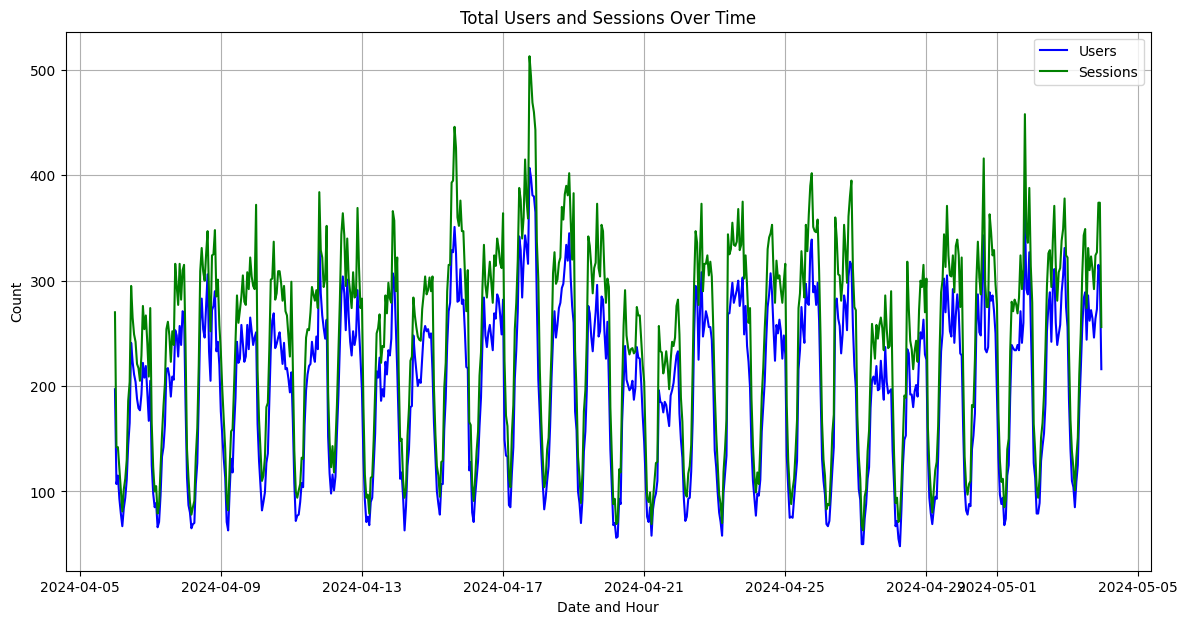

In [14]:
# Now, let's analyze the total users and sessions over time:

import matplotlib.pyplot as plt

# plotting the aggregated users and sessions over time:
plt.figure(figsize=(14, 7))
plt.plot(grouped_data.index, grouped_data['Users'], label ='Users', color = 'blue')
plt.plot(grouped_data.index, grouped_data['Sessions'], label='Sessions', color = 'green')
plt.title('Total Users and Sessions Over Time')
plt.xlabel('Date and Hour')
plt.ylabel('Count')
plt.legend()
plt.grid(True)
plt.show()

From the graph, we can observe there are some fluctuations in the number of users and sessions, possibly indicating daily cycles or specific high-traffic periods. Both users and sessions apperar to follow a similar trend, which is expected as more users generally mean more sessions. Some peaks migth correspond to specific marketing activities, promotions, or events

Now that we've analyzed the session trends, let's move on to User Engagement Analysis. We will look into metrics like average engagement time per session, engagement rate, and events per session to evaluate how engaged users are when the visit the site: 

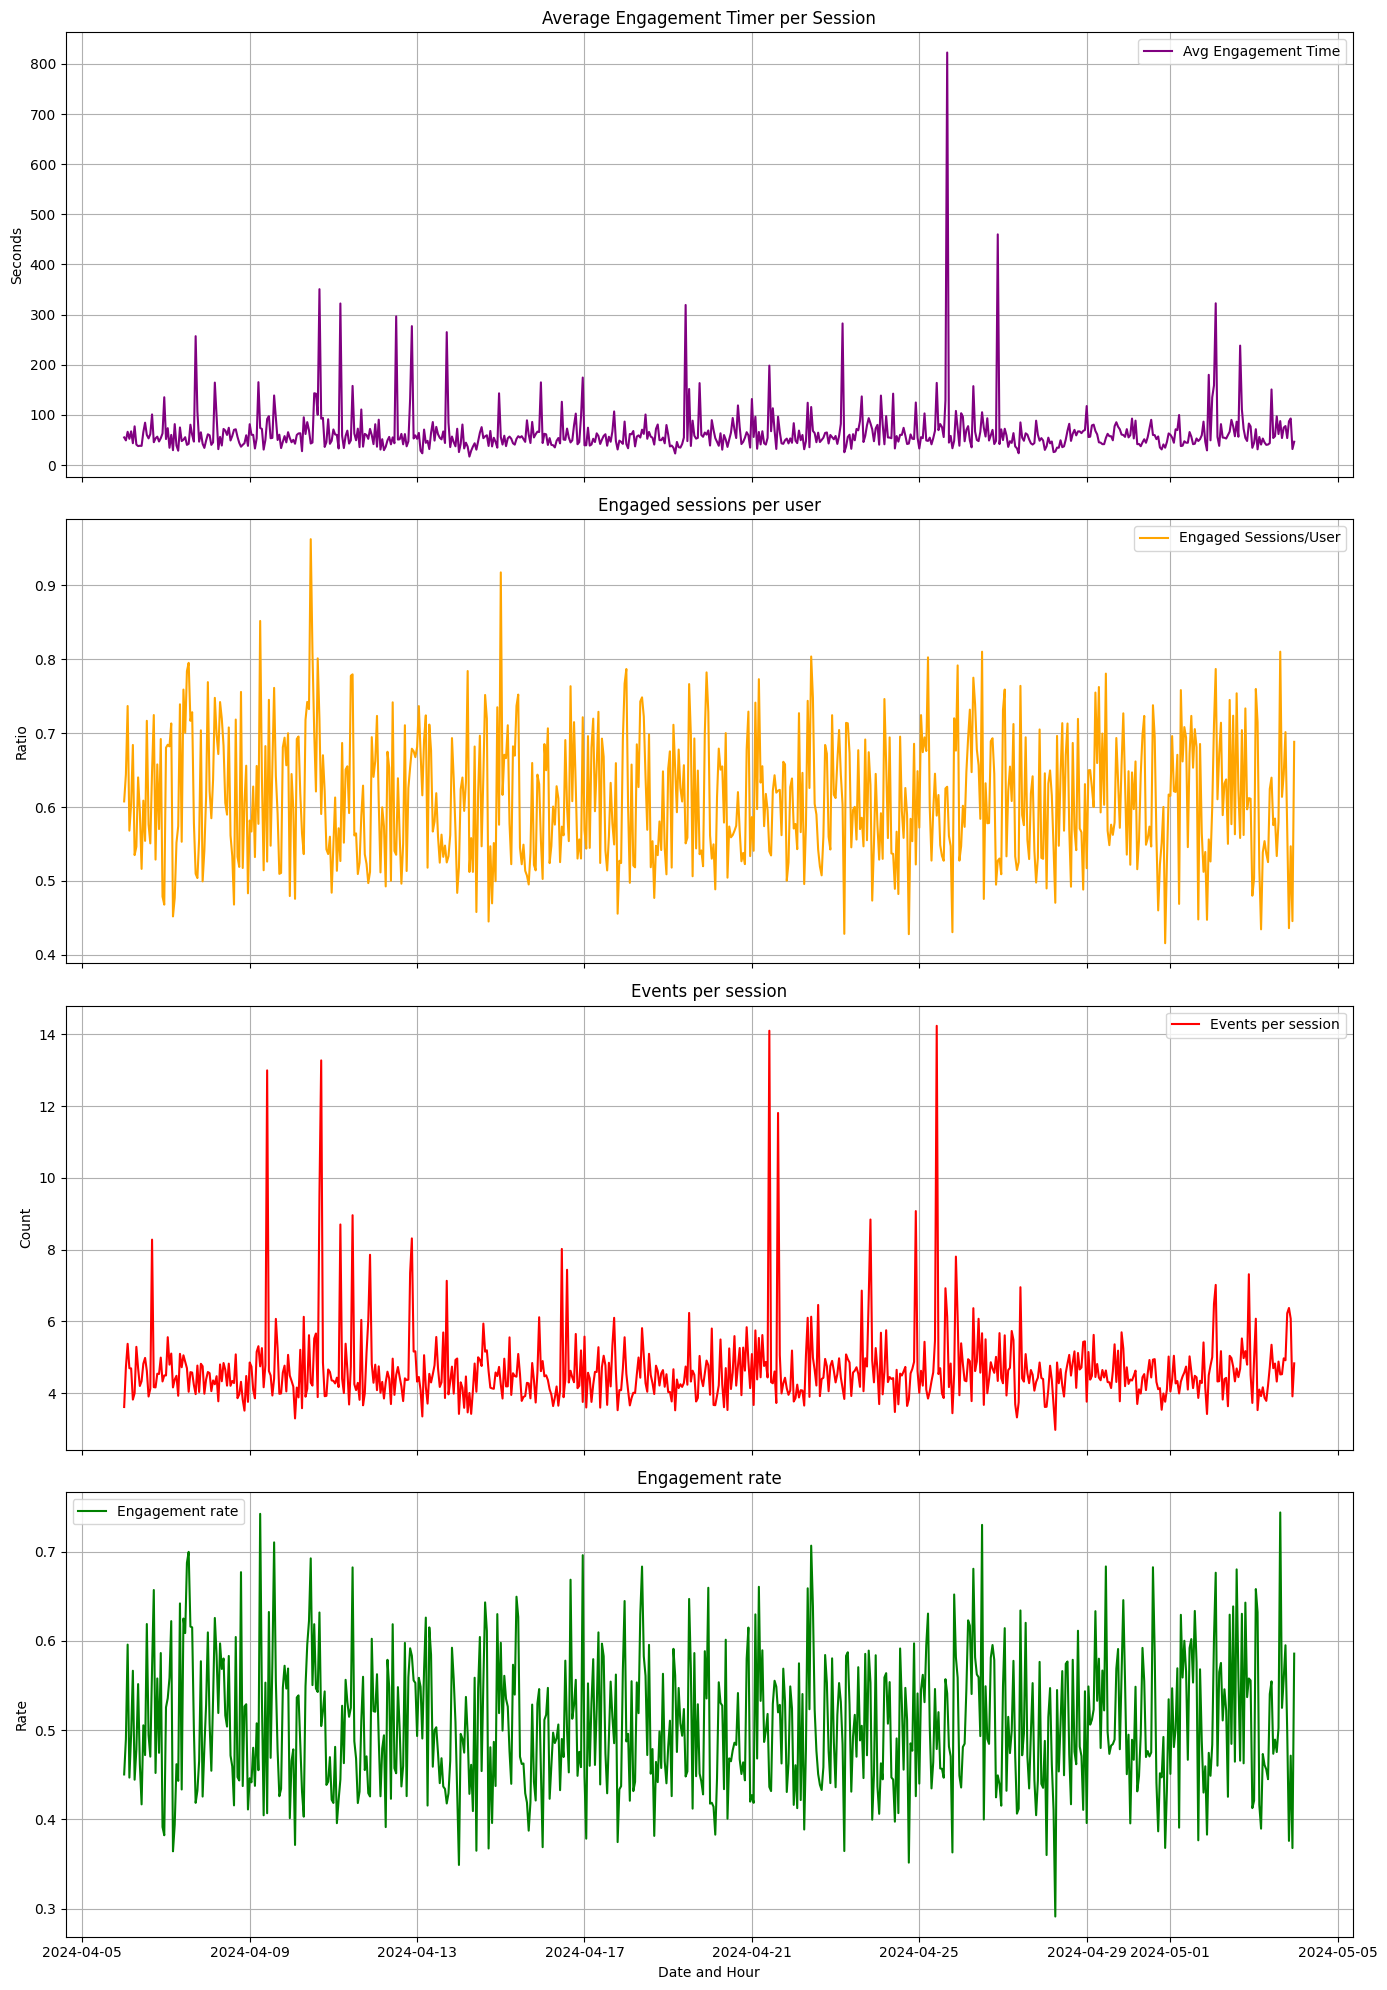

In [23]:
# convert relevant columns to numeric for engagement analysis

data['Engaged sessions'] = pd.to_numeric(data['Engaged sessions'])
data['Average engagement time per session'] = pd.to_numeric(data['Average engagement time per session'])
data['Engaged sessions per user'] = pd.to_numeric(data['Engaged sessions per user'])
data['Events per session'] = pd.to_numeric(data['Events per session'])
data['Engagement rate'] = pd.to_numeric(data['Engagement rate'])

# group data by date and calculate mean for engagement metrics
engagement_metrics = data.groupby(data['Data + hour (YYYMMDDHH)']).agg({
    'Average engagement time per session': 'mean',
    'Engaged sessions per user': 'mean',
    'Events per session': 'mean',
    'Engagement rate': 'mean'
})

# plotting engagement metrics
fig, ax = plt.subplots(4, 1, figsize=(14, 20), sharex=True)

ax[0].plot(engagement_metrics.index, engagement_metrics['Average engagement time per session'], label='Avg Engagement Time', color='purple')
ax[0].set_title('Average Engagement Timer per Session')
ax[0].set_ylabel('Seconds')

ax[1].plot(engagement_metrics.index, engagement_metrics['Engaged sessions per user'], label='Engaged Sessions/User', color='orange')
ax[1].set_title('Engaged sessions per user')
ax[1].set_ylabel('Ratio')

ax[2].plot(engagement_metrics.index, engagement_metrics['Events per session'], label='Events per session', color='red')
ax[2].set_title('Events per session')
ax[2].set_ylabel('Count')

ax[3].plot(engagement_metrics.index, engagement_metrics['Engagement rate'], label='Engagement rate', color='green')
ax[3].set_title('Engagement rate')
ax[3].set_ylabel('Rate')
ax[3].set_xlabel('Date and Hour')

for a in ax:
    a.legend()
    a.grid(True)

plt.tight_layout()
plt.show()

The user engagement analysis provides insights into how visitors interact with the website:
1. Average Engagement Time per Session: The time spent per session shows fluctuations over the observed period. There are noticiable peaks, suggesting times when users were particularly engaged, potentially due to specific content releases or events
2. Engaged Sessions per User: this ratio fluctuates slightly but generally indicates that a doog portion of sessions per user are engaged. Peaks in this metric could correspond to times when users find the content more relevant or engaging 
3. Events per Session: The count of events per session remains relatively consistent but does show some variation. Pearks here could indicate more interactive content or features being used by visitors
4. Engagement Rate: The engagement rate over time shows how many sessions are considered engaged out of the total. there are some ups and downs which may relate to how different content resonate with users or how effective certain user acquisition channels are.


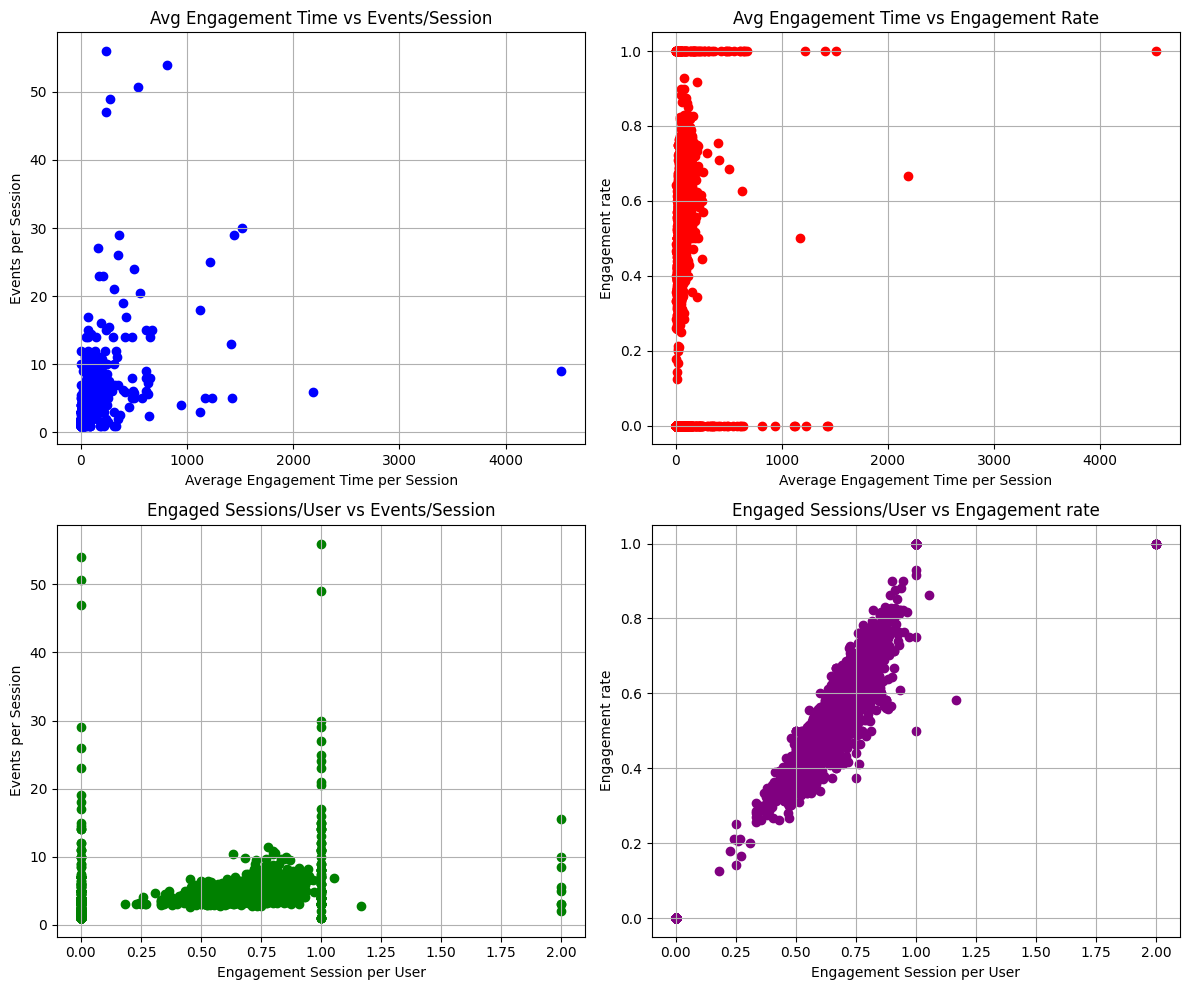

In [29]:
# Now, let's analyze the correlations between them:

fig, axes = plt.subplots(2, 2, figsize=(12, 10))

# plot 1: average engagement time vs events per session
axes[0, 0].scatter(data['Average engagement time per session'], data['Events per session'], color='blue')
axes[0, 0].set_title('Avg Engagement Time vs Events/Session')
axes[0, 0].set_xlabel('Average Engagement Time per Session')
axes[0, 0].set_ylabel('Events per Session')
axes[0, 0].grid(True) # enable grid

# plot 2: average engagement time vs engagement rate
axes[0, 1].scatter(data['Average engagement time per session'], data['Engagement rate'], color='red')
axes[0, 1].set_title('Avg Engagement Time vs Engagement Rate')
axes[0, 1].set_xlabel('Average Engagement Time per Session')
axes[0, 1].set_ylabel('Engagement rate')
axes[0, 1].grid(True) 

# plot 3: engaged sessions per user vs events per session
axes[1, 0].scatter(data['Engaged sessions per user'], data['Events per session'], color='green')
axes[1, 0].set_title('Engaged Sessions/User vs Events/Session')
axes[1, 0].set_xlabel('Engagement Session per User')
axes[1, 0].set_ylabel('Events per Session')
axes[1, 0].grid(True) 


# plot 4: engaged sessions per user vs engagement rate
axes[1, 1].scatter(data['Engaged sessions per user'], data['Engagement rate'], color='purple')
axes[1, 1].set_title('Engaged Sessions/User vs Engagement rate')
axes[1, 1].set_xlabel('Engagement Session per User')
axes[1, 1].set_ylabel('Engagement rate')
axes[1, 1].grid(True) 

plt.tight_layout()
plt.show()

Here's what we can analyze from the above scatter plots:
1. Average Engagement Time vs Events per Session: There appears to be a concentration of data points at lower average engagement time with a wide range of events per session. As the average engagement time increases, the number of events per session tends to cluster more norrowly aorund lower values
2. Average Engagement time vs Engagement Rate: There is a clear trend where sessions with very low engagement times have a broad range of engagement rates, but as engagement time increases, the engagement rate converges towards higher values
3. Engaged Sessions per User vs Events per Session: Most data points cluster at lower values for both metric, with few users having a high number of engaged sessions or events per session
4. Engaged Sessions per User vs Engagement Rate: There is a strong positive correlation between engaged sessions per user and engagement rate, especially notiacble at higher values of engaged sessions per user.

We will proceed with the Channel Performance Analysis to assess how different marketing channels contribute to traffic and engagement. It will ilvove analyzing the session, user, and engagement data segmented by the marketing channel:

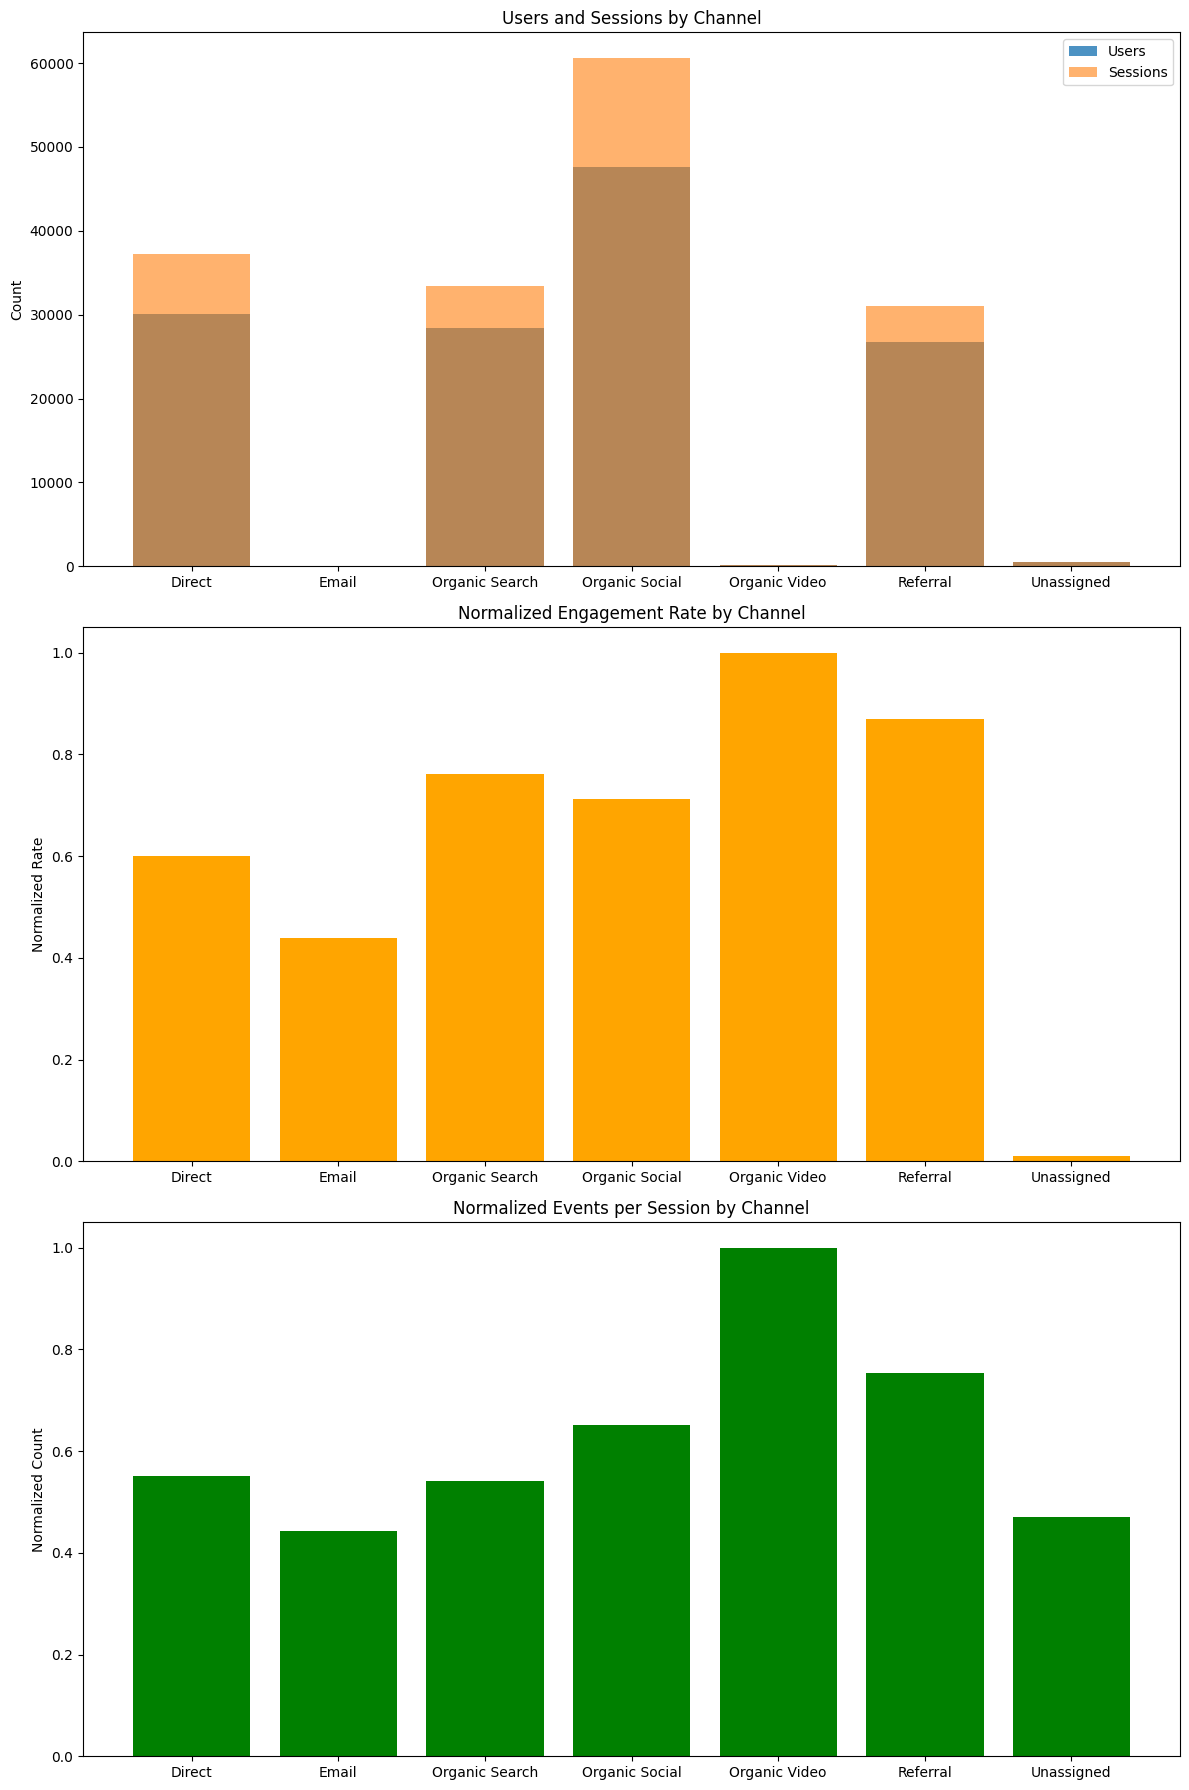

In [30]:
# group data by channel and aggregate necessary metrics
channel_performance = data.groupby('Session primary channel group (Default channel group)').agg({
    'Users': 'sum',
    'Sessions': 'sum',
    'Engaged sessions': 'sum',
    'Engagement rate': 'mean',
    'Events per session': 'mean'
})

# normalize engagement rate and events per session for comparison
channel_performance['Normalized Engagement Rate'] = channel_performance['Engagement rate'] / channel_performance['Engagement rate'].max()
channel_performance['Normalized Events per Session'] = channel_performance['Events per session'] / channel_performance['Events per session'].max()

# plotting channel performance metrics
fig, ax = plt.subplots(3, 1, figsize=(12, 18))

# users and sessions by channel
ax[0].bar(channel_performance.index, channel_performance['Users'], label='Users', alpha=0.8)
ax[0].bar(channel_performance.index, channel_performance['Sessions'], label = 'Sessions', alpha=0.6)
ax[0].set_title('Users and Sessions by Channel')
ax[0].set_ylabel('Count')
ax[0].legend()

# normalized engagement rate by channel
ax[1].bar(channel_performance.index, channel_performance['Normalized Engagement Rate'], color='orange')
ax[1].set_title('Normalized Engagement Rate by Channel')
ax[1].set_ylabel('Normalized Rate')


# normalized events per session by channel
ax[2].bar(channel_performance.index, channel_performance['Normalized Events per Session'], color='green')
ax[2].set_title('Normalized Events per Session by Channel')
ax[2].set_ylabel('Normalized Count')

plt.tight_layout()
plt.show()


The data illustrates significant variations in performance across different channels, highlighting the strengths and weaknesses of each in driving traffic, engaging users, and encounraging interactions. The high performance of 'Organic Search' in driving traffic contrasts with its lower relative engagement and events metrics, suggesting quantity over quality of vitits. In contrast, 'Referral' and 'Organic Video' channels, while not leading in volume, excel in engaging users deeply, pointing to potential areas for leveraring these strengths in marketing strategic

### Forescasting Website Traffic

Now, let's see how we can forescast the website traffic for the next 24 hours. It will involve creating a times series model to forescast future values based on the observed session data. Let's start this by plotting the autocorrelation and partial autocorrelation plots of our time series data, which is tipically done to help identify the order of an autoregressive integrated moving average for time series models for forecasting:

C:\Users\T14\AppData\Local\Temp\ipykernel_13028\2831210259.py:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
C:\Users\T14\AppData\Local\Temp\ipykernel_13028\2831210259.py:2: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')


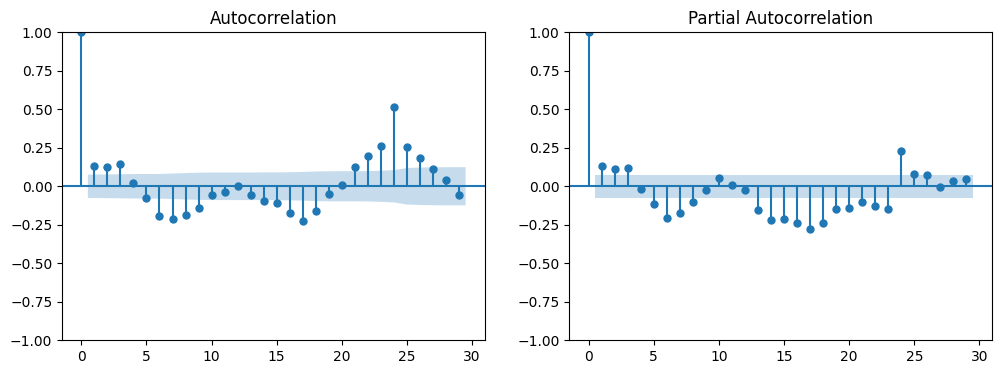

In [33]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24

differenced_series = time_series_data.diff().dropna()

# plot ACF and PACF of time series
fig, axes = plt.subplots(1, 2, figsize=(12,4))
plot_acf(differenced_series, ax=axes[0])
plot_pacf(differenced_series, ax=axes[1])
plt.show()

Here's how to interpret the above graph
1. PACF (Partial Autocorrelation Function): This plot helps determine the p parameter for the AR part of the model. You look for the lag after which most partial autocorrelations are not significantly different from zero. In our plot, the PACF shows a significant spike at lag 1 and then cuts off, suggesting an AR part of order 1. Therefore, p=1
2. ACF (Autocorrelation Fuction): this plot helps identify the q parameter for the MA part of the model. You look for the lag after which most autorrelations are not significantly different from zero. The ACF plot in ut case tails off gradually, but considering the first significant spike is essential. Since the spike at lag 1 is significant and there's a gradual tailing off rathen than a sharp cut-off, it suggests a potencial MA component. However, the tailing-off nature complicates the exact determination of q, but a starting point of q=1 could be considered 

C:\Users\T14\AppData\Local\Temp\ipykernel_13028\4240111746.py:5: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
C:\Users\T14\AppData\Local\Temp\ipykernel_13028\4240111746.py:5: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
C:\Users\T14\AppData\Local\Temp\ipykernel_13028\4240111746.py:19: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='red')


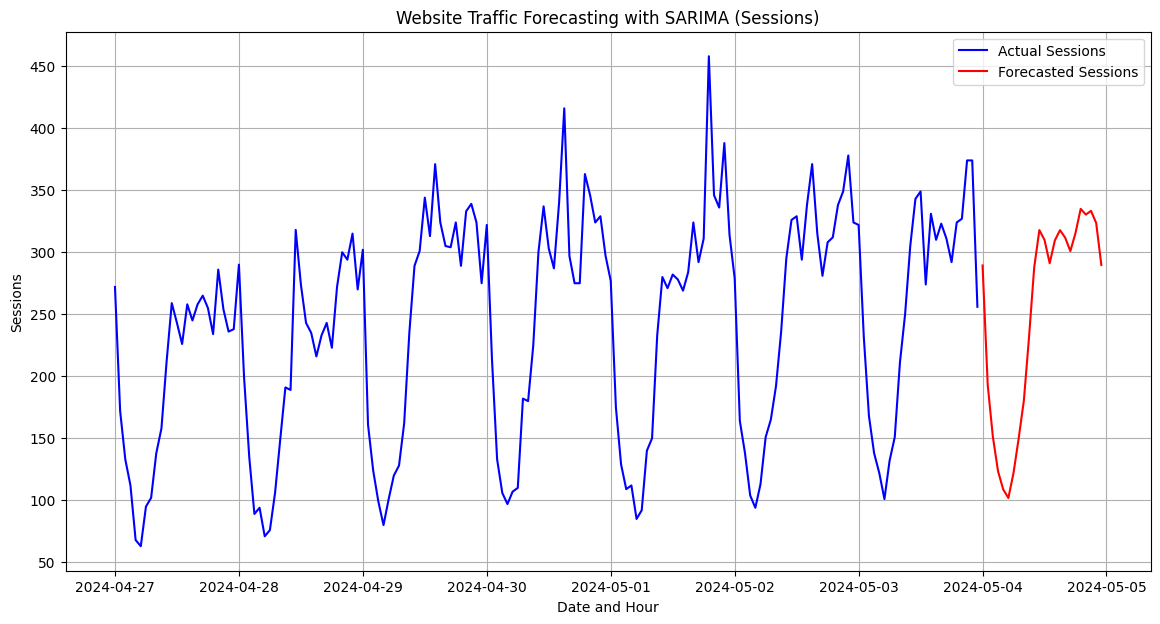

In [34]:
# The other parameter is d, representing seasonality. In our case, as seasonality exists, we can choose the value of d as 1. Now, here's how we can forescast the website's traffic for the next 24 hours using the SARIMA model:

from statsmodels.tsa.statespace.sarimax import SARIMAX

time_series_data = grouped_data['Sessions'].asfreq('H').fillna(method='ffill')
seasonal_period = 24

sarima_model = SARIMAX(time_series_data,
                       order=(1, 1, 1),
                       seasonal_order=(1, 1, 1, seasonal_period))
sarima_model_fit = sarima_model.fit()

# forecast the next 24 hours using the SARIMA model
sarima_forecast = sarima_model_fit.forecast(steps=24)

# plotting the actual data and the SARIMA forescast
plt.figure(figsize=(14, 7))
plt.plot(time_series_data.index[-168:], time_series_data [-168:], label='Actual Sessions', color='blue') #last week data
plt.plot(pd.date_range(time_series_data.index[-1], periods=25, freq='H')[1:], sarima_forecast, label='Forecasted Sessions', color='red')
plt.title('Website Traffic Forecasting with SARIMA (Sessions)')
plt.xlabel('Date and Hour')
plt.ylabel('Sessions')
plt.legend()
plt.grid(True)
plt.show()
